In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models

In [6]:
train_df = pd.read_csv('sign_mnist_train.csv')  # Change path if needed
test_df = pd.read_csv('sign_mnist_test.csv')

In [7]:
# Separate features and labels
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

In [8]:
# Normalize and reshape
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [9]:
# One-hot encode labels
num_classes = np.max(y_train) + 1  # Fix: account for all label indices
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)


In [10]:

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train
model.fit(X_train, y_train_cat, epochs=10, validation_split=0.2, batch_size=64)

Epoch 1/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 0.3654 - loss: 2.2052 - val_accuracy: 0.8926 - val_loss: 0.3819
Epoch 2/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.9240 - loss: 0.2777 - val_accuracy: 0.9913 - val_loss: 0.0699
Epoch 3/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.9943 - loss: 0.0530 - val_accuracy: 0.9991 - val_loss: 0.0201
Epoch 4/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.9998 - loss: 0.0141 - val_accuracy: 0.9991 - val_loss: 0.0102
Epoch 5/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.9999 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0042
Epoch 6/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 7/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.9998 - val_loss: 0.0020
Epoch 8/10
344/344 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - accuracy: 1.0000 - loss: 0.0012 - 

In [13]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9071 - loss: 0.3994
Test Accuracy: 0.9090


In [14]:
# Predict and show confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [15]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))


Classification Report:

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       331
           1       1.00      0.97      0.98       432
           2       1.00      1.00      1.00       310
           3       1.00      1.00      1.00       245
           4       0.89      0.93      0.91       498
           5       1.00      1.00      1.00       247
           6       0.88      0.84      0.86       348
           7       0.93      0.91      0.92       436
           8       0.84      0.92      0.87       288
          10       0.99      1.00      0.99       331
          11       0.86      1.00      0.92       209
          12       0.94      0.90      0.92       394
          13       0.99      0.72      0.83       291
          14       1.00      0.83      0.91       246
          15       1.00      0.97      0.99       347
          16       0.83      0.99      0.90       164
          17       0.65      0.57      0.61       144
  

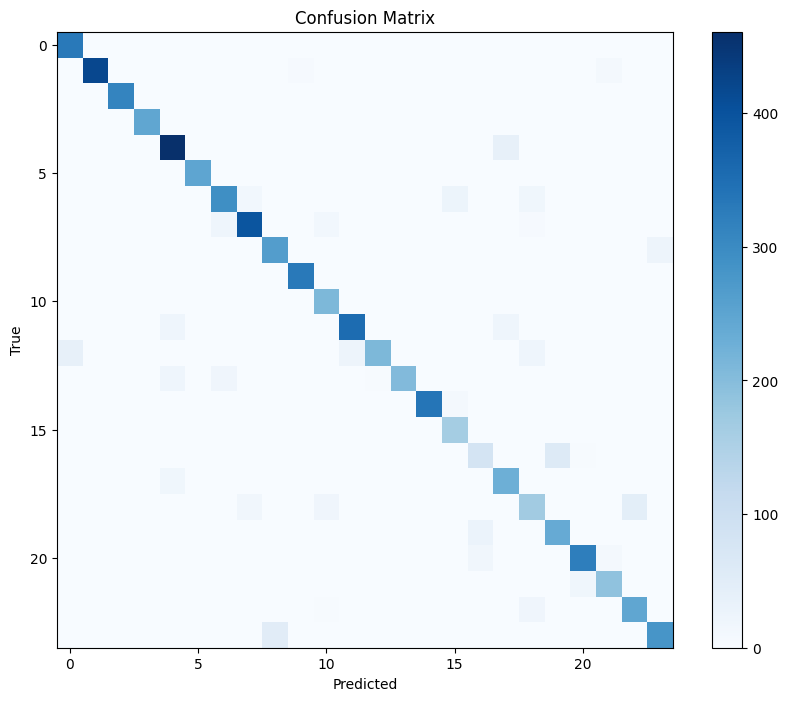

In [16]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()